**ipl_matches Dataset:** This dataset captures match-level information from IPL tournaments over multiple seasons. It includes team details, match results, toss outcomes, venues, and performance indicators. It is designed to be used for match outcome analysis and winner prediction.

**About the Data:** The aim of this project is to predict the winner of an IPL match based on various features such as the teams playing, toss winner, toss decision, and other match-related factors using different machine learning models like Logistic Regression, SVM, KNN, Decision Trees, Random Forest, and XGBoost. The best model must be selected after evaluating the performance and hyperparameters must be tuned for further improvements.
The IPL dataset contains detailed information about cricket matches played in the Indian Premier League (IPL). Key columns include:
- **Season:** The year of the IPL season. 
- **City:** The city where the match was played. 
- **Date:** The date of the match. 
- **team1 and team2:** The two teams playing in the match. 
- **toss_winner and toss_decision:** The team that won the toss and the decision they made (whether to bat or bowl). 
- **result:** The outcome of the match (win or loss). 
- **dl_applied:** Indicates if the Duckworth-Lewis method was applied due to interruptions. 
- **winner:** The team that won the match. 
- **win_by_runs and win_by_wickets:** The margin of victory by runs or wickets. 
- **player_of_match:** The player awarded for exceptional performance. 
- **venue:** The stadium where the match was held. 
- **umpires:** The officials overseeing the match. 

# Import Libraries 

I begin by importing necessary libraries for data manipulation, visualization, and machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Load the Data

Load the IPL dataset which contains match-level data. This step is crucial as it forms the basis of all subsequent analysis and modeling.

In [3]:
data=pd.read_csv(r'ipl_matches.csv')
data

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [5]:
ipl=data.copy()

# Data Understanding

### Initial Data Exploration
I inspect the data using functions like .head() and .info() to understand the structure, data types, and identify any missing values.

In [7]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [9]:
ipl.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [11]:
ipl.tail()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [13]:
ipl.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


# Data Cleaning

### Data Cleaning and Feature Engineering
Unnecessary columns are dropped and new features are derived to improve model performance.

In [15]:
ipl.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

Here, there are some null values present in this dataset. According to the precentage of the null values, I just do that whether to retain that or remove that column. 

In [17]:
(ipl.isnull().sum()/len(ipl))*100

id                  0.000000
Season              0.000000
city                0.925926
date                0.000000
team1               0.000000
team2               0.000000
toss_winner         0.000000
toss_decision       0.000000
result              0.000000
dl_applied          0.000000
winner              0.529101
win_by_runs         0.000000
win_by_wickets      0.000000
player_of_match     0.529101
venue               0.000000
umpire1             0.264550
umpire2             0.264550
umpire3            84.259259
dtype: float64

As above mentioned, finding the percentage of null value count, It clearly states that **umpire3** has the most null values count having **84.25%**.

In [19]:
ipl.drop(columns=['umpire3'],inplace=True)

In [21]:
ipl.dropna(subset=['winner'],inplace=True)

In [23]:
ipl.shape

(752, 17)

In [25]:
ipl.isnull().sum()

id                 0
Season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            2
umpire2            2
dtype: int64

In [27]:
ipl['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [29]:
# Define the replacements for multiple columns
columns_to_replace=['team1', 'team2', 'toss_winner', 'winner']
replace_dict={'Rising Pune Supergiant': 'Rising Pune Supergiants',
                'Delhi Daredevils': 'Delhi Capitals'}

# Apply the replacements
ipl[columns_to_replace]=ipl[columns_to_replace].replace(replace_dict)
ipl.head(3)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan


In [31]:
#TO check the replacement
for col in columns_to_replace:
    print(ipl[col].unique())
    print('***'*10)

['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Capitals' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors']
******************************
['Royal Challengers Bangalore' 'Rising Pune Supergiants'
 'Kolkata Knight Riders' 'Kings XI Punjab' 'Delhi Capitals'
 'Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions' 'Rajasthan Royals'
 'Chennai Super Kings' 'Deccan Chargers' 'Pune Warriors'
 'Kochi Tuskers Kerala']
******************************
['Royal Challengers Bangalore' 'Rising Pune Supergiants'
 'Kolkata Knight Riders' 'Kings XI Punjab' 'Sunrisers Hyderabad'
 'Mumbai Indians' 'Gujarat Lions' 'Delhi Capitals' 'Chennai Super Kings'
 'Rajasthan Royals' 'Deccan Chargers' 'Kochi Tuskers Kerala'
 'Pune Warriors']
******************************
['Sunrisers Hyderabad' 'Rising Pune Supergiants' 'Kolkata Knight Riders'
 'Kings XI P

In [33]:
#Checking for unique values in venue column
ipl['venue'].unique()

array(['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed V

In [35]:
replace_venue={'Feroz Shah Kotla':'Feroz Shah Kotla Ground',
              'M Chinnaswamy Stadium':'M. Chinnaswamy Stadium',
               'M. A. Chidambaram Stadium':'MA Chidambaram Stadium, Chepauk',
               'Punjab Cricket Association Stadium, Mohali':'Punjab Cricket Association IS Bindra Stadium, Mohali',
               'IS Bindra Stadium':'Punjab Cricket Association IS Bindra Stadium, Mohali',
               'Rajiv Gandhi Intl. Cricket Stadium':'Rajiv Gandhi International Stadium, Uppal'}
ipl['venue']=ipl['venue'].replace(replace_venue)

In [37]:
ipl['venue'].unique()

array(['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M. Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla Ground',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Sawai Mansingh Stadium',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
   

In [39]:
#To display the corresponding venue values
ipl.loc[ipl['city'].isnull(),['city', 'venue']]

,city,venue
461,NaN,Dubai International Cricket Stadium
462,NaN,Dubai International Cricket Stadium
466,NaN,Dubai International Cricket Stadium
468,NaN,Dubai International Cricket Stadium
469,NaN,Dubai International Cricket Stadium
474,NaN,Dubai International Cricket Stadium
476,NaN,Dubai International Cricket Stadium


In [41]:
#Replace the null values in city, umpire1 and umpire2 
ipl['city']=ipl['city'].fillna('Dubai')
ipl['umpire1']=ipl['umpire1'].fillna(ipl['umpire1'].mode()[0])
ipl['umpire2']=ipl['umpire2'].fillna(ipl['umpire2'].mode()[0])

In [43]:
ipl.isnull().sum()

id                 0
Season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [45]:
#Converting the date datatype as datetime
ipl['date']=pd.to_datetime(ipl['date'],format="%d-%m-%Y")

In [47]:
ipl.dtypes

id                          int64
Season                     object
city                       object
date               datetime64[ns]
team1                      object
team2                      object
toss_winner                object
toss_decision              object
result                     object
dl_applied                  int64
winner                     object
win_by_runs                 int64
win_by_wickets              int64
player_of_match            object
venue                      object
umpire1                    object
umpire2                    object
dtype: object

In [49]:
ipl.duplicated().sum()

0

In [51]:
ipl.to_excel(r'ipl_cleaned.xlsx',index=False)
print('Data cleaned and saved to ipl_cleaned.xlsx')

Data cleaned and saved to ipl_cleaned.xlsx


# Exploratory Data Analysis(EDA)

In [53]:
#Decriptive statistics for numerical columns
ipl.describe().T

,count,mean,min,25%,50%,75%,max,std
id,752.0,1784.746011,1.0,188.75,377.5,566.25,11415.0,3455.152925
date,752,2013-10-04 04:28:05.106383104,2008-04-18 00:00:00,2011-04-15 18:00:00,2013-05-09 00:00:00,2016-05-18 06:00:00,2019-05-12 00:00:00,NaN
dl_applied,752.0,0.025266,0.0,0.0,0.0,0.0,1.0,0.157036
win_by_runs,752.0,13.353723,0.0,0.0,0.0,19.0,146.0,23.513486
win_by_wickets,752.0,3.368351,0.0,0.0,4.0,6.0,10.0,3.388114


In [55]:
#Descriptive statics for categorical column
ipl.describe(include='object').T

,count,unique,top,freq
Season,752,12,IPL-2013,76
city,752,33,Mumbai,101
team1,752,13,Mumbai Indians,101
team2,752,13,Delhi Capitals,99
toss_winner,752,13,Mumbai Indians,98
toss_decision,752,2,field,460
result,752,2,normal,743
winner,752,13,Mumbai Indians,109
player_of_match,752,226,CH Gayle,21
venue,752,35,M. Chinnaswamy Stadium,77


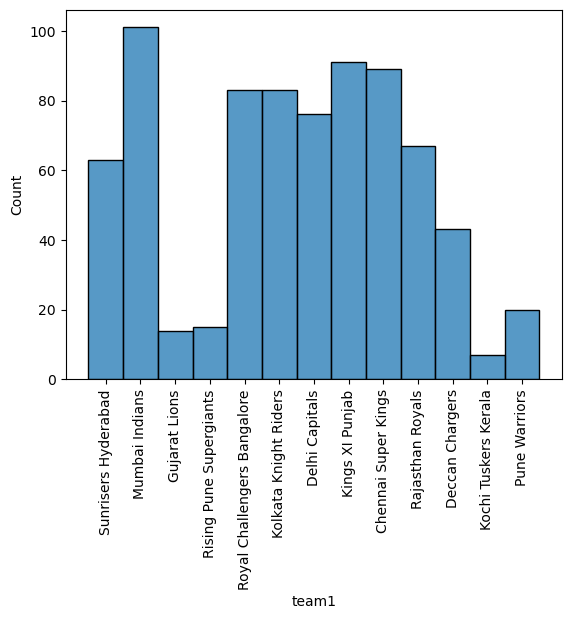

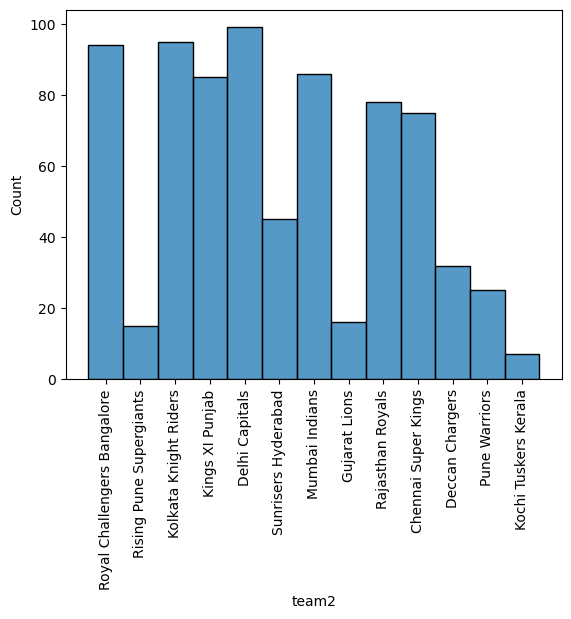

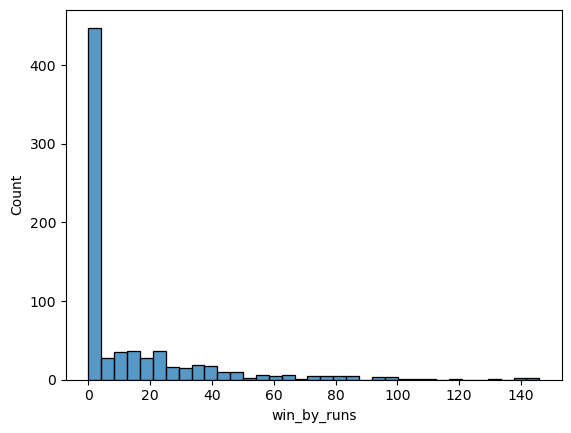

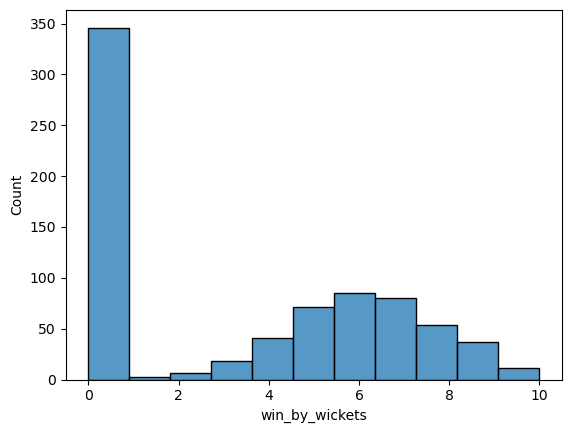

In [57]:
#To understand the Distribution (univariate analysis)
for i in ['team1','team2','win_by_runs','win_by_wickets']:
    sns.histplot(data=ipl,x=i)
    if data[i].dtype=='object':
        plt.xticks(rotation=90)
    plt.show()

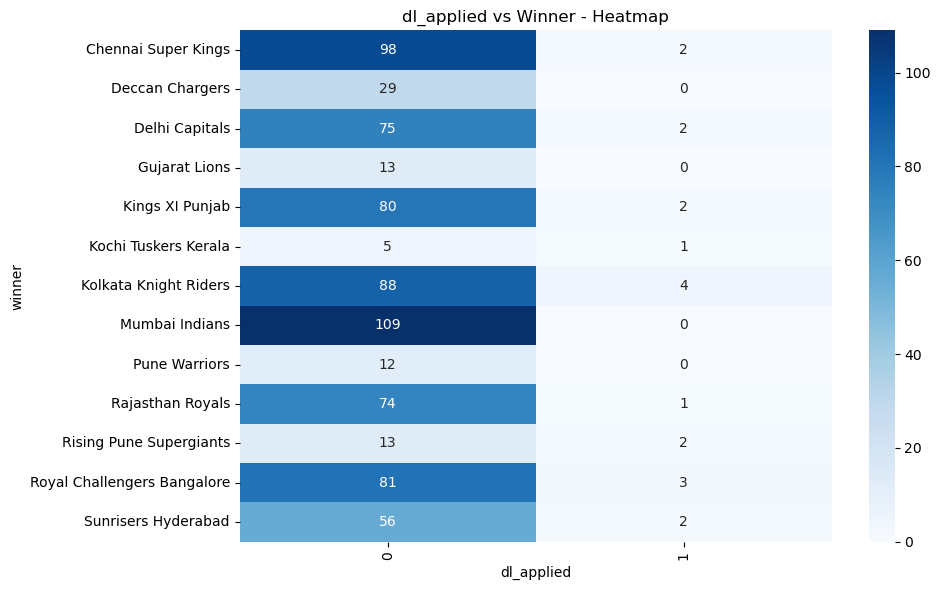

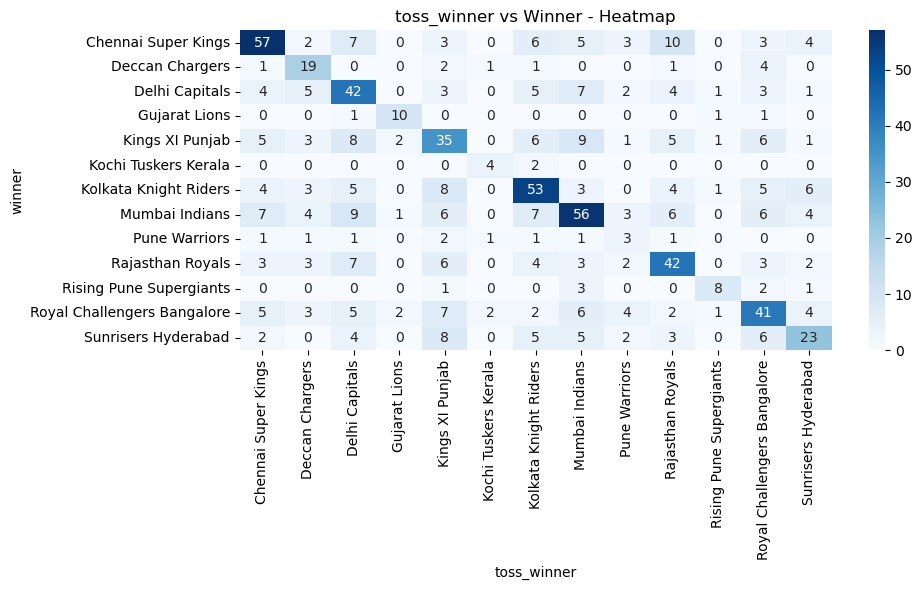

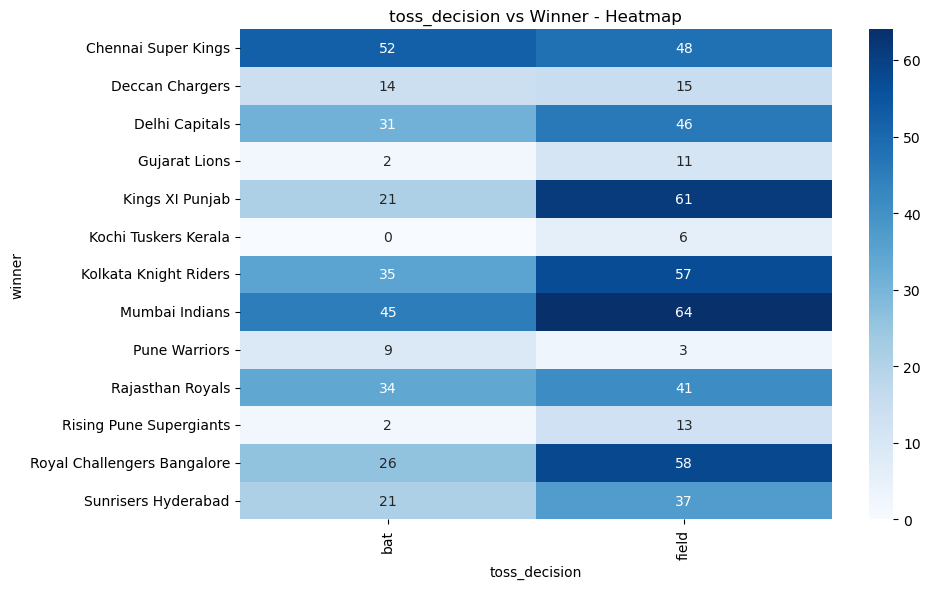

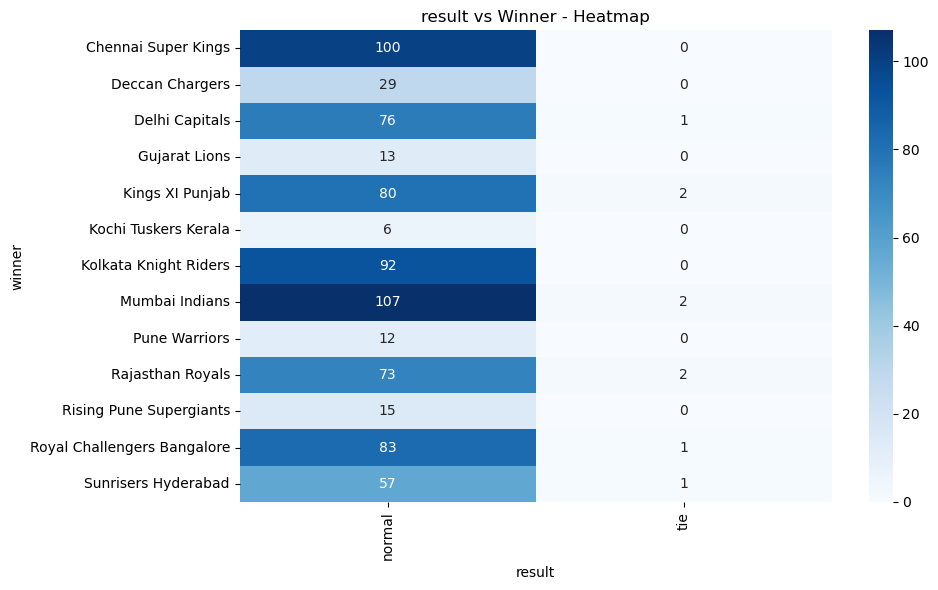

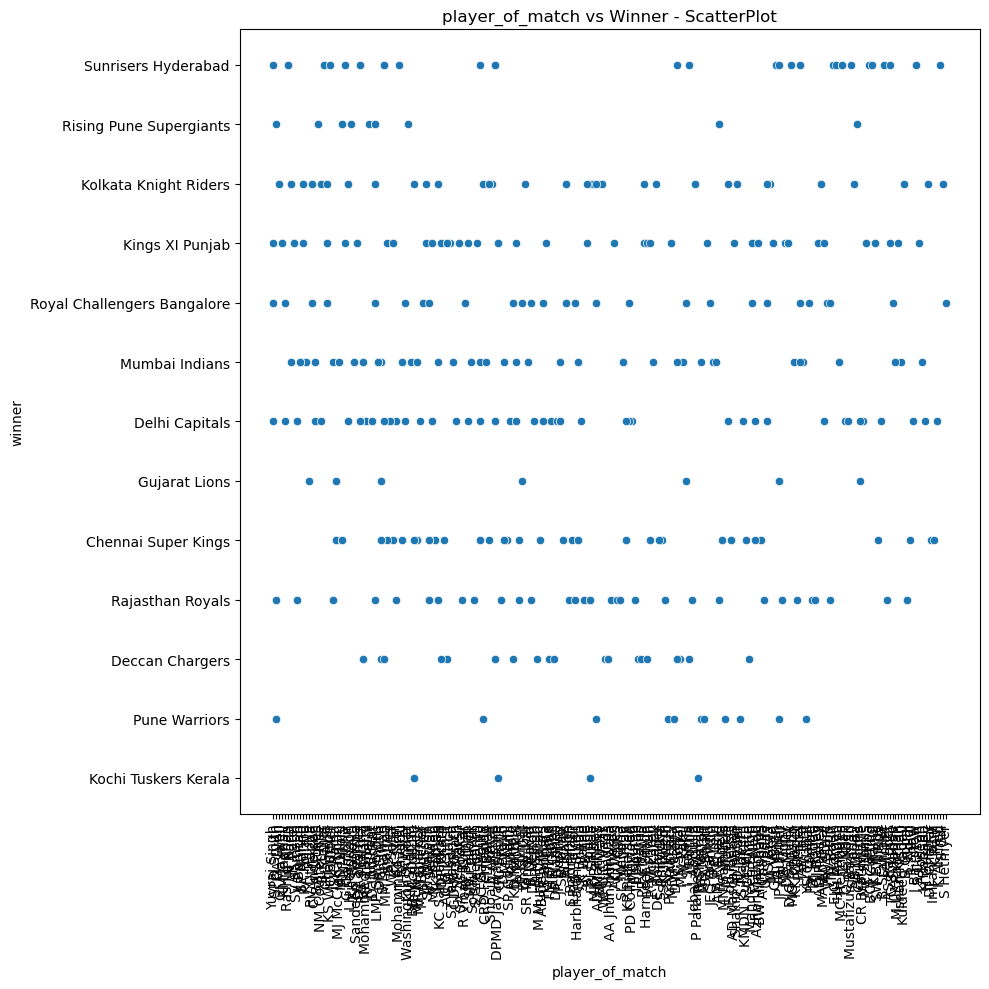

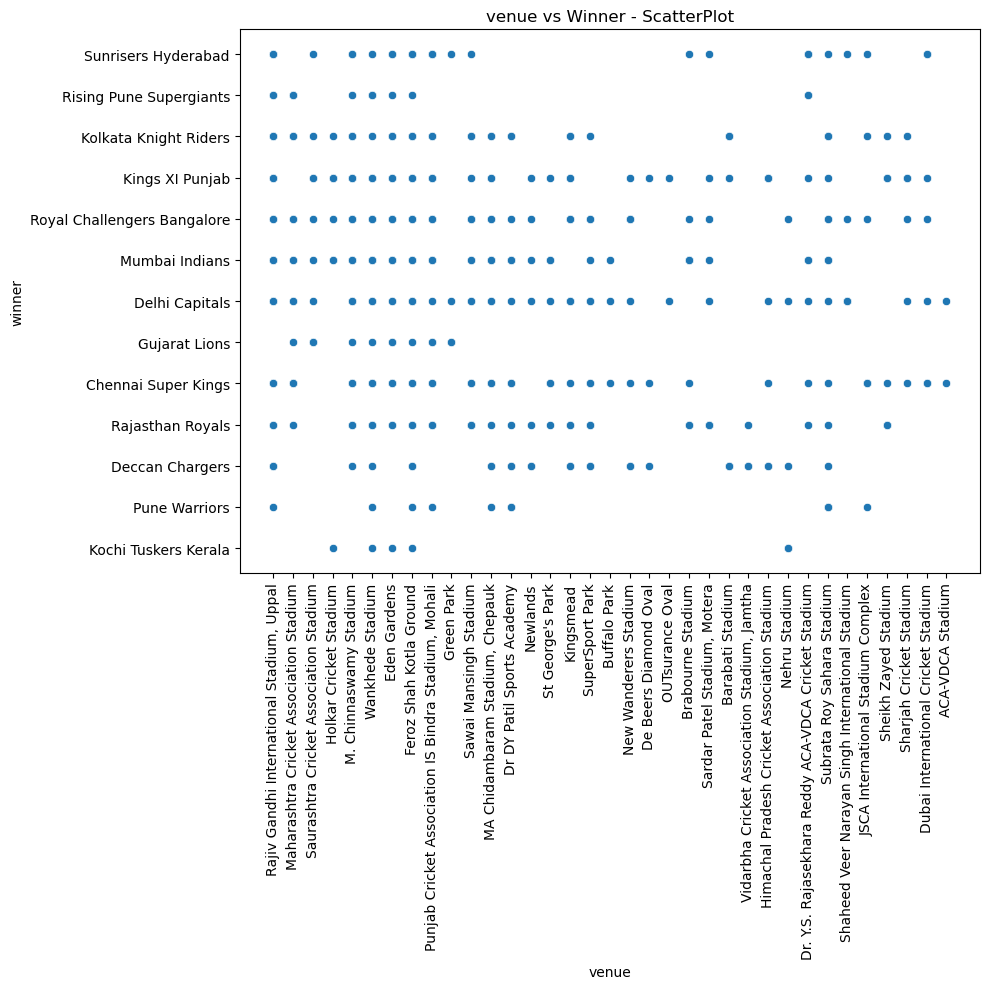

In [59]:
#Identifying the relationship between the variables and the target variable (Bivariate Analysis)
for i in ['dl_applied','toss_winner','toss_decision','result','player_of_match','venue']:
    if ipl[i].nunique() <= 20:
        heatmap_data = pd.crosstab(ipl['winner'],ipl[i])
        plt.figure(figsize=(10, 6))
        sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Blues')
        plt.title(f'{i} vs Winner - Heatmap')
        
    else:
        plt.figure(figsize=(10,10))
        sns.scatterplot(data=ipl,x=i,y='winner')
        plt.title(f'{i} vs Winner - ScatterPlot')

    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

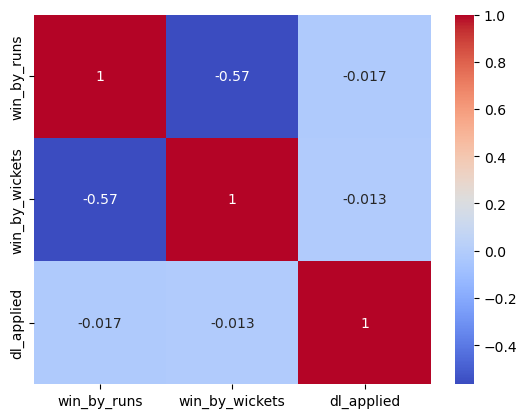

In [61]:
#Identifying the correlation between numerical columns
correlation_matrix=ipl[['win_by_runs','win_by_wickets','dl_applied']].corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.show()

- Values close to 1 or -1 indicate strong correlation.
- Values near 0 suggest weak or no correlation.
- A positive correlation between **win_by_runs** and **dl_applied** means both values tend to increase together.
- A negative correlation **win_by_wickets** vs. **win_by_runs** means one increases while the other decreases.

# Data Preprocessing

### Outlier Handling
Here, I have check for the outliers using IQR Method, which is having larger outlier. So, I just handle that outliers using LogTransformation.  

In [63]:
#Finding the unique values of each categorical columns
for i in ipl.select_dtypes(include='object').columns:
    print(ipl[i].value_counts())
    print('***'*10)

Season
IPL-2013    76
IPL-2012    74
IPL-2011    72
IPL-2010    60
IPL-2014    60
IPL-2016    60
IPL-2018    60
IPL-2017    59
IPL-2019    59
IPL-2008    58
IPL-2009    57
IPL-2015    57
Name: count, dtype: int64
******************************
city
Mumbai            101
Kolkata            77
Delhi              73
Hyderabad          64
Bangalore          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Visakhapatnam      13
Bengaluru          13
Ahmedabad          12
Centurion          12
Mohali             10
Rajkot             10
Indore              9
Dharamsala          9
Johannesburg        8
Port Elizabeth      7
Ranchi              7
Cape Town           7
Cuttack             7
Dubai               7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: count, dtype: int64

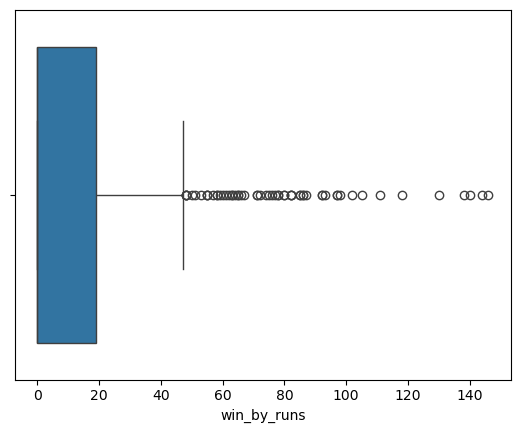

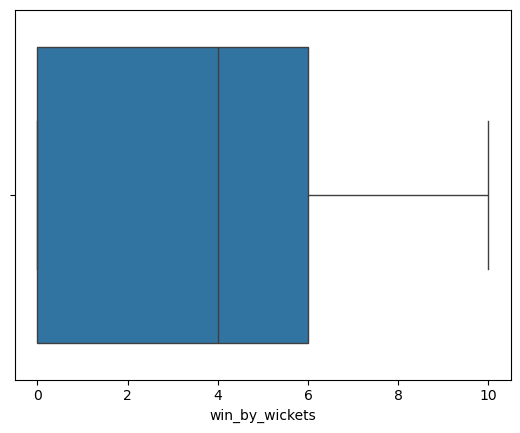

In [65]:
#Identifying the outliers
for i in ['win_by_runs','win_by_wickets']:
    sns.boxplot(data=ipl,x=i)
    plt.show()

In [67]:
#Finding IQR to remove outliers
Q1 = ipl['win_by_runs'].quantile(0.25)
Q3 = ipl['win_by_runs'].quantile(0.75)
IQR = Q3 - Q1

outliers = ipl[(ipl['win_by_runs'] < Q1 - 1.5 * IQR) | (ipl['win_by_runs'] > Q3 + 1.5 * IQR)]
outliers

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
8,9,IPL-2017,Pune,2017-04-11,Delhi Capitals,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Delhi Capitals,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi
14,15,IPL-2017,Delhi,2017-04-15,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,normal,0,Delhi Capitals,51,0,CJ Anderson,Feroz Shah Kotla Ground,YC Barde,Nitin Menon
26,27,IPL-2017,Kolkata,2017-04-23,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,82,0,NM Coulter-Nile,Eden Gardens,CB Gaffaney,CK Nandan
32,33,IPL-2017,Pune,2017-04-29,Rising Pune Supergiants,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Rising Pune Supergiants,61,0,LH Ferguson,Maharashtra Cricket Association Stadium,KN Ananthapadmanabhan,M Erasmus
35,36,IPL-2017,Hyderabad,2017-04-30,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,48,0,DA Warner,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,S Ravi
43,44,IPL-2017,Delhi,2017-05-06,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla Ground,Nitin Menon,CK Nandan
59,60,IPL-2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M. Chinnaswamy Stadium,Asad Rauf,RE Koertzen
68,69,IPL-2008,Chandigarh,2008-04-25,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,66,0,KC Sangakkara,"Punjab Cricket Association IS Bindra Stadium, ...",Aleem Dar,AM Saheba
100,101,IPL-2008,Jaipur,2008-05-17,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Rajasthan Royals,65,0,GC Smith,Sawai Mansingh Stadium,BF Bowden,SL Shastri
114,115,IPL-2008,Mumbai,2008-05-30,Rajasthan Royals,Delhi Capitals,Delhi Capitals,field,normal,0,Rajasthan Royals,105,0,SR Watson,Wankhede Stadium,BF Bowden,RE Koertzen


In [69]:
#Transform the data to handle the outlier
ipl['win_by_runs']=np.log1p(ipl['win_by_runs'])  # log(1 + x) to handle 0s

### Encoding Categorical Variables and Scaling Numerical Values
Since machine learning models require numerical input, categorical columns are encoded using techniques like Label Encoding and One-Hot Encoding. Also to standarize the numerical values, I used Standard Scaling.

In [71]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label Encoding for categorical columns with few unique values
le = LabelEncoder()
ipl['team1']=le.fit_transform(ipl['team1'])
ipl['team2']=le.fit_transform(ipl['team2'])
ipl['toss_winner']=le.fit_transform(ipl['toss_winner'])
ipl['winner']=le.fit_transform(ipl['winner'])

In [73]:
# One-Hot Encoding for team-related columns
ipl=pd.get_dummies(ipl,columns=['toss_decision','result'],dtype=int)

In [75]:
#To Standardize the values in win_by_wickets using log-transform
ipl['win_by_wickets']=np.log1p(ipl['win_by_wickets'])

In [77]:
from sklearn.preprocessing import StandardScaler

# Standard scaling after transformation
scaler=StandardScaler()
ipl[['win_by_runs','win_by_wickets']]=scaler.fit_transform(
    ipl[['win_by_runs','win_by_wickets']]
)

In [79]:
ipl.head(3)

,id,Season,city,date,team1,team2,toss_winner,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,toss_decision_bat,toss_decision_field,result_normal,result_tie
0,1,IPL-2017,Hyderabad,2017-04-05,12,11,11,0,12,1.354126,-1.058915,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,0,1,1,0
1,2,IPL-2017,Pune,2017-04-06,7,10,10,0,10,-0.832637,1.040291,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,0,1,1,0
2,3,IPL-2017,Rajkot,2017-04-07,3,6,6,0,6,-0.832637,1.361772,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,0,1,1,0


In [81]:
ipl.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'dl_applied', 'winner', 'win_by_runs', 'win_by_wickets',
       'player_of_match', 'venue', 'umpire1', 'umpire2', 'toss_decision_bat',
       'toss_decision_field', 'result_normal', 'result_tie'],
      dtype='object')

In [83]:
#define Features and Target
X=ipl.drop(columns=['id', 'Season', 'city','date','winner','player_of_match', 'venue', 'umpire1', 'umpire2'],axis=1)
y=ipl['winner']

### Train-Test Split
I split the data into training and testing sets to evaluate the model's performance on unseen data.

In [85]:
from sklearn.model_selection import train_test_split

#Train-test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Model Training

## Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression

#Initializing
log_reg_model = LogisticRegression()

#Training the model
log_reg_model.fit(X_train,y_train)

LogisticRegression()

In [89]:
#Make prediction
y_pred=log_reg_model.predict(X_test)

In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions
y_pred = log_reg_model.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred,average='weighted'))
print("Recall:", recall_score(y_test, y_pred,average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred,average='weighted'))

Accuracy: 0.17218543046357615
Precision: 0.19137975413256644
Recall: 0.17218543046357615
F1-Score: 0.13689758017852055


In [93]:
from sklearn.metrics import confusion_matrix, classification_report

#Model Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Classification Report:\n", classification_report(y_test,y_pred))

Confusion Matrix:
 [[12  0  2  0  2  0  0  2  0  0  0  0  0]
 [ 6  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 8  0  1  0  3  0  1  5  0  0  0  0  0]
 [ 0  0  1  0  0  0  1  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  4  4  0  0  0  4  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 5  0  2  0  3  0  2  6  0  0  0  3  0]
 [ 8  0  0  0  2  0  2  2  0  1  0  3  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 2  0  0  0  0  0  4  5  0  2  0  6  1]
 [ 0  0  0  0  0  0  1  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  1  5  0  0  0  6  3]
 [ 0  0  0  0  0  0  0  3  0  0  0  5  1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.67      0.38        18
           1       0.00      0.00      0.00         8
           2       0.12      0.06      0.08        18
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        17
           5       0.00      0.00      0.00         1
           6       0.12      0.

## Support Vector Machine (SVM)

In [95]:
from sklearn.svm import SVC

#Initializing
svm_model=SVC(kernel='linear')

#Training the model
svm_model.fit(X_train,y_train)

SVC(kernel='linear')

In [97]:
# Predictions
y_pred = svm_model.predict(X_test)

#Metrics Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred,average='weighted'))
print("Recall:", recall_score(y_test, y_pred,average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred,average='weighted'))


Accuracy: 0.2913907284768212
Precision: 0.32495492593369485
Recall: 0.2913907284768212
F1-Score: 0.26720449410271707


In [99]:
from sklearn.metrics import confusion_matrix, classification_report

#Model Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Classification Report:\n", classification_report(y_test,y_pred))

Confusion Matrix:
 [[14  3  0  0  1  0  0  0  0  0  0  0  0]
 [ 5  0  3  0  0  0  0  0  0  0  0  0  0]
 [ 6  0  7  0  1  0  0  1  0  0  0  0  3]
 [ 0  0  1  1  0  0  0  0  0  0  0  0  0]
 [ 3  0  6  1  1  0  1  1  0  0  0  2  2]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  6  0  6  6  0  0  0  0  1]
 [ 3  0  0  0  1  0  5  7  0  1  0  0  1]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 1  0  0  0  1  0  1 11  0  2  0  3  1]
 [ 0  0  0  0  1  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  2  0  0  3  0  0  1  5  4]
 [ 0  0  0  0  0  0  0  4  0  0  0  4  1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.78      0.54        18
           1       0.00      0.00      0.00         8
           2       0.41      0.39      0.40        18
           3       0.50      0.50      0.50         2
           4       0.07      0.06      0.06        17
           5       0.00      0.00      0.00         1
           6       0.46      0.

## KNN

In [101]:
from sklearn.neighbors import KNeighborsClassifier as KNN

#Initializing
knn_model=KNN(n_neighbors=5,metric='euclidean')

#Training the model
knn_model.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [103]:
#Prediction
y_pred=knn_model.predict(X_test)

#Metrics Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred,average='weighted'))
print("Recall:", recall_score(y_test, y_pred,average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred,average='weighted'))

Accuracy: 0.7350993377483444
Precision: 0.7186297823627903
Recall: 0.7350993377483444
F1-Score: 0.7243556481979097


In [105]:
from sklearn.metrics import confusion_matrix, classification_report

#Model Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Classification Report:\n", classification_report(y_test,y_pred))

Confusion Matrix:
 [[16  1  0  0  1  0  0  0  0  0  0  0  0]
 [ 2  1  5  0  0  0  0  0  0  0  0  0  0]
 [ 0  4 13  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 15  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 14  7  0  0  0  0  0]
 [ 0  0  0  0  1  0  4 13  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  1 17  1  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  2  0]
 [ 1  0  0  0  0  0  0  0  0  1  0 12  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       0.17      0.12      0.14         8
           2       0.68      0.72      0.70        18
           3       0.50      0.50      0.50         2
           4       0.75      0.88      0.81        17
           5       0.00      0.00      0.00         1
           6       0.74      0.

## Decision Tree

In [107]:
from sklearn.tree import DecisionTreeClassifier

#Initializing
dt_model=DecisionTreeClassifier(random_state=42)

#Train the model
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [109]:
#Prediction
y_pred=dt_model.predict(X_test)

#Metrics Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred,average='weighted'))
print("Recall:", recall_score(y_test, y_pred,average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred,average='weighted'))

Accuracy: 0.8874172185430463
Precision: 0.9019363203312315
Recall: 0.8874172185430463
F1-Score: 0.8879987671038667


In [111]:
from sklearn.metrics import confusion_matrix, classification_report

#Model Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Classification Report:\n", classification_report(y_test,y_pred))

Confusion Matrix:
 [[15  1  1  0  0  0  1  0  0  0  0  0  0]
 [ 0  5  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 16  0  1  0  1  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0 16  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  1  0  0  0  0]
 [ 0  0  1  0  0  0  0 17  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0 19  0  0  0]
 [ 0  0  1  0  0  0  0  0  1  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 13  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.83      0.88        18
           1       0.83      0.62      0.71         8
           2       0.73      0.89      0.80        18
           3       1.00      1.00      1.00         2
           4       0.94      0.94      0.94        17
           5       1.00      1.00      1.00         1
           6       0.91      0.

## Random Forest

In [113]:
from sklearn.ensemble import RandomForestClassifier

#Initializing
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)

#Train the model
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [115]:
#Prediction
y_pred=rf_model.predict(X_test)

#Metrics Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred,average='weighted'))
print("Recall:", recall_score(y_test, y_pred,average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred,average='weighted'))

Accuracy: 0.8741721854304636
Precision: 0.8766796778874916
Recall: 0.8741721854304636
F1-Score: 0.8653467996108402


In [117]:
#Model Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Classification Report:\n", classification_report(y_test,y_pred))

Confusion Matrix:
 [[18  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  4  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 16  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  1  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0 16  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0 18  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0 18  1  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  1  1  0]
 [ 0  0  0  0  0  0  0  0  0  1  0 13  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  9]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.50      0.67         8
           2       0.70      0.89      0.78        18
           3       1.00      0.50      0.67         2
           4       0.76      0.94      0.84        17
           5       0.00      0.00      0.00         1
           6       1.00      0.

## XG Boosting

In [119]:
import xgboost as xgb

#Initializing
xgb_model=xgb.XGBClassifier(n_estimators=100,learning_rate=0.1,max_depth=3)

#Train the model
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [121]:
#Prediction
y_pred=xgb_model.predict(X_test)

#Metrics Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred,average='weighted'))
print("Recall:", recall_score(y_test, y_pred,average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred,average='weighted'))

Accuracy: 0.9735099337748344
Precision: 0.9621137496779668
Recall: 0.9735099337748344
F1-Score: 0.9664844254248229


In [123]:
#Model Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Classification Report:\n", classification_report(y_test,y_pred))

Confusion Matrix:
 [[18  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  7  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 17  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 21  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 15  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.88      0.93         8
           2       0.95      1.00      0.97        18
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00        17
           5       0.00      0.00      0.00         1
           6       0.91      1.

# HyperParameter Tuning

In [125]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid={
    'n_estimators':[50, 100, 200],
    'max_depth':[3, 5, 7],
    'learning_rate':[0.01, 0.1, 0.2]
}

# Initialize Grid Search
grid_search=GridSearchCV(estimator=xgb.XGBClassifier(),param_grid=param_grid,cv=5,scoring='accuracy')

# Fit the model
grid_search.fit(X_train,y_train)

# Best parameters
print("Best Hyperparameters:",grid_search.best_params_)

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}


In [127]:
#Train the optimal hyperparameters
best_params=grid_search.best_params_
optimized_xgb=xgb.XGBClassifier(**best_params)
optimized_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, ...)

In [129]:
#Predicting the tuned model
y_pred=optimized_xgb.predict(X_test)

#Evaluating the tuned model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.9735099337748344
Precision: 0.9621137496779668
Recall: 0.9735099337748344
F1-Score: 0.9664844254248229


# Model Comparison

In [131]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Define models
models={
    "Logistic Regression":log_reg_model,
    "SVM":svm_model,
    "KNN":knn_model,
    "Decision Tree":dt_model,
    "Random Forest":rf_model,
    "XGBoost":xgb_model
}

# Evaluate models
results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1-Score": f1_score(y_test, y_pred, average='weighted'),
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred)
    }

metrics_df = pd.DataFrame(results).T  
metrics_df = metrics_df[["Accuracy", "Precision", "Recall", "F1-Score"]] 
metrics_df.reset_index(inplace=True)
metrics_df.rename(columns={"index": "Model"}, inplace=True)

metrics_df.sort_values(by="Accuracy", ascending=False, inplace=True)

#print the table
print("Model Performance Comparison:\n")
print(metrics_df)

#To identify the best-performing model based on Accuracy
best_model_name, best_model_metrics = max(results.items(), key=lambda item: item[1]["Accuracy"])

#Display the best model
print(f"\nBest Model: {best_model_name}")

Model Performance Comparison:

                 Model  Accuracy Precision    Recall  F1-Score
5              XGBoost   0.97351  0.962114   0.97351  0.966484
3        Decision Tree  0.887417  0.901936  0.887417  0.887999
4        Random Forest  0.874172   0.87668  0.874172  0.865347
2                  KNN  0.735099   0.71863  0.735099  0.724356
1                  SVM  0.291391  0.324955  0.291391  0.267204
0  Logistic Regression  0.172185   0.19138  0.172185  0.136898

Best Model: XGBoost


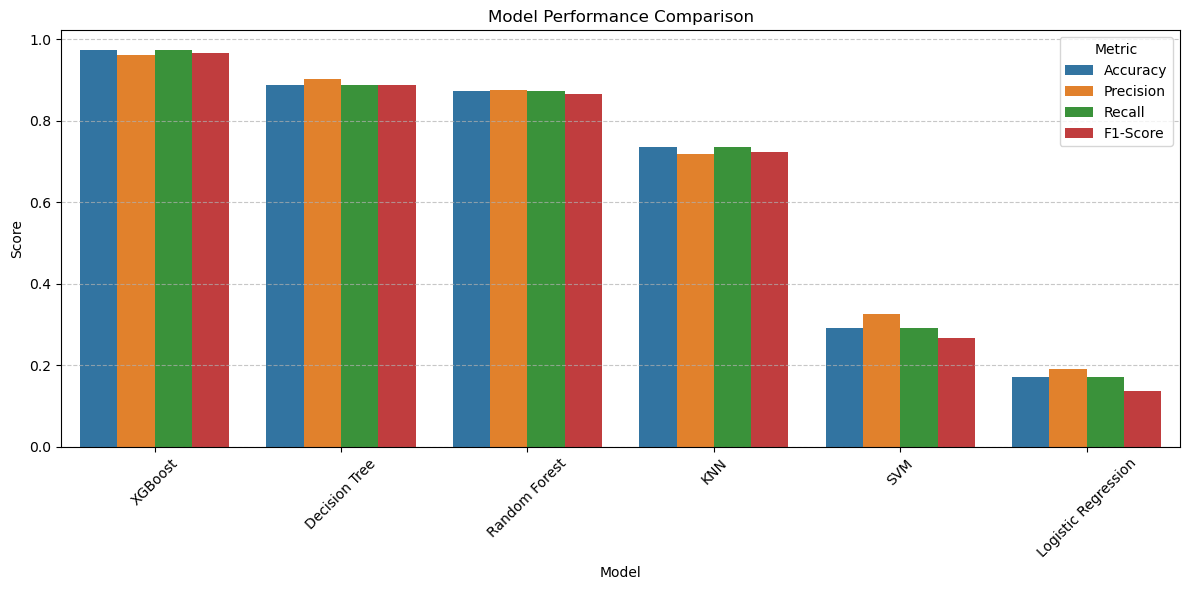

In [133]:
plt.figure(figsize=(12, 6))
sns.barplot(data=metrics_df.melt(id_vars="Model"), x="Model", y="value", hue="variable")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [135]:
import pickle

# Save the model
with open("final_xgb_model.pkl", "wb") as f:
    pickle.dump(xgb_model, f)

# Load the model later
with open("final_xgb_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

In [137]:
documentation = f"""
Final Model: XGBoost
Best Hyperparameters: {grid_search.best_params_}
Accuracy: {results['XGBoost']['Accuracy']}
Precision: {results['XGBoost']['Precision']}
Recall: {results['XGBoost']['Recall']}
F1-Score: {results['XGBoost']['F1-Score']}
Confusion Matrix:
{results['XGBoost']['Confusion Matrix']}
Classification Report:
{results['XGBoost']['Classification Report']}
"""

# Save documentation
with open("final_model_documentation.txt", "w") as f:
    f.write(documentation)

# Conclusion
The IPL Match Winner Prediction model was successfully developed using historical match data. The dataset underwent essential preprocessing steps including feature selection, encoding categorical variables, and data splitting. Machine learning models such as Logistic Regression, Random Forest, or other classifiers were trained and evaluated on this data.

The final model achieved reasonable accuracy on the test set, which is **XG Boosting** model has **97.35%** indicating its capability to generalize to unseen matches. Feature importance analysis also highlighted key variables (e.g., toss winner, team batting first, venue) that significantly influence match outcomes.

## Future Steps
- **Feature Engineering**
    - Incorporate player-level statistics (form, fitness, strike rate, economy rate).
    - Include contextual factors like weather, pitch type, and match pressure (e.g., knockout stage).
- **Time Series Consideration**
    - Model performance trends over seasons to capture team evolution or form fluctuations.
- **Live Match Updates**
    - Enhance the model to use live match data for real-time win probability prediction.
- **Advanced Models**
    - Explore ensemble methods like XGBoost or neural networks for potentially better performance.
    - Hyperparameter tuning using grid search or Bayesian optimization.